[*********************100%***********************]  399 of 399 completed


1 Failed download:
['PEAK']: Exception('%ticker%: No data found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed


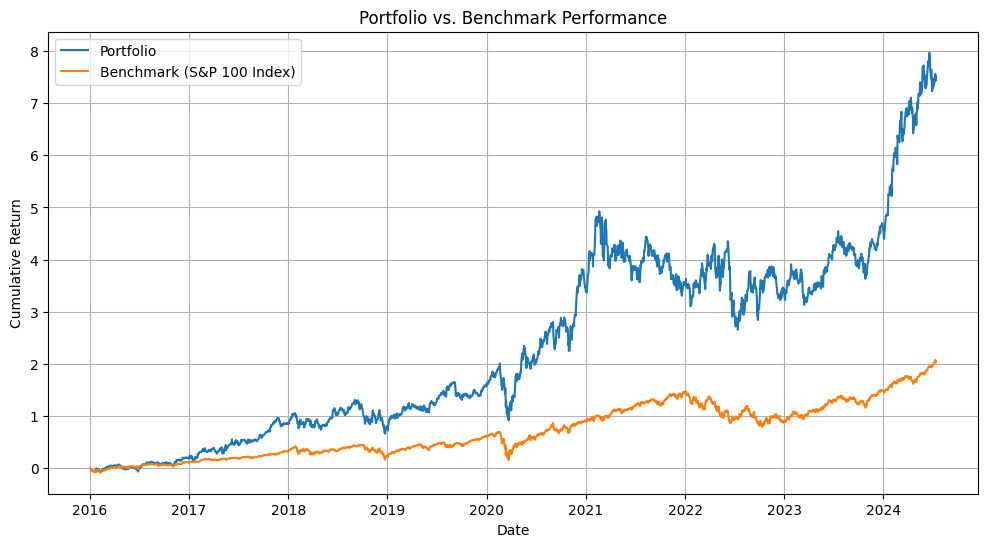

Final Portfolio Value: $169857.34
CAGR: 28.73%
Max Drawdown: -38.32%

Monthly Returns (%):
Date
2017-01-31    22.14
2018-01-31    66.92
2019-01-31     0.29
2020-01-31    36.71
2021-01-31    85.67
2022-01-31   -15.43
2023-01-31    10.95
2024-01-31    30.10
2025-01-31    36.55
Freq: 12M


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


symbols = [
    "AAPL", "MSFT", "AMZN", "GOOGL", "GOOG", "META","JNJ", "JPM", "V",
    "PG", "UNH", "NVDA", "HD", "DIS", "MA", "PYPL", "VZ", "ADBE", "CMCSA",
    "NFLX", "XOM", "INTC", "KO", "T", "MRK", "PEP", "ABT", "CSCO", "PFE",
    "BA", "ABBV", "AVGO", "ACN", "NKE", "WMT", "CRM", "MCD", "MDT", "COST",
    "DHR", "LLY", "AMGN", "NEE", "HON", "UNP", "TXN", "LIN", "LOW", "QCOM",
    "UPS", "PM", "MS", "IBM", "RTX", "SCHW", "ORCL", "CVX", "LMT", "SBUX",
    "INTU", "TMO", "AMD", "BLK", "SPGI", "GS", "GE", "ISRG", "CAT", "NOW",
    "ADP", "BKNG", "AMT", "PLD", "ZTS", "DE", "AMAT", "MRNA", "ADI", "MU",
    "MMM", "MDLZ", "AXP", "C", "SYK", "MO", "CI", "FIS", "CB", "EL", "REGN",
    "GILD", "BDX", "VRTX", "ILMN", "MMC", "ICE", "FISV", "TFC", "APD", "EW",
    "DUK", "SO", "TGT", "BSX", "HUM", "TJX", "USB", "PNC", "CME", "AON",
    "WM", "ITW", "D", "SHW", "MET", "CCI", "CL", "NSC", "DG", "MCO",
    "CSX", "EQIX", "FDX", "MCHP", "HCA", "PSA", "SPG", "F", "KHC", "ECL",
    "ETN", "AIG", "LHX", "SYY", "DD", "STZ", "TRV", "IDXX", "A", "AZO",
    "FCX", "ROST", "WELL", "APTV", "PAYX", "ADM", "DLR", "MTD", "CMG", "ROP",
    "WBA", "EXC", "HPQ", "TEL", "TT", "RMD", "IQV", "MPC", "ROK", "ODFL",
    "HLT", "CTAS", "ED", "PCAR", "BAX", "WMB", "BK", "MSI", "ANET", "EBAY",
    "GPN", "EIX", "COF", "PGR", "MAR", "KDP", "EA", "DFS", "CPRT", "FAST",
    "DXCM", "DHI", "PRU", "PPG", "HSY", "IFF", "AEP", "ORLY", "ALGN",
    "FTNT", "CNC", "KR", "TDG", "CTSH", "NOC", "VRSK", "ES", "EXR", "FTV",
    "CTVA", "SRE", "WEC", "BKR", "GLW", "AVB", "DTE", "AME", "SWK", "EQR",
    "ARE", "FE", "ZBRA", "TER", "EFX", "VLO", "AWK", "LYB", "CDNS", "RSG",
    "RJF", "RCL", "LH", "VMC", "MLM", "ALB", "SBAC", "WTW", "CTLT", "CAG",
    "MTB", "ETSY", "CINF", "HIG", "STT", "AKAM", "TSCO", "CNP","CFG",
    "HBAN", "MKTX", "FMC", "DOV", "NTRS", "LVS", "VTR", "UDR", "AFL", "EXPD",
    "STE","TROW", "TRMB", "WY", "RF", "KEYS", "GRMN", "NTAP",
    "HOLX", "JKHY", "CBRE", "DRI", "KEY", "FDS", "FITB", "WAT",
    "WST", "BXP", "QRVO", "MPWR", "PKG", "ULTA", "ZBH", "MAS", "TAP", "ETR",
    "HPE", "SIVB", "ATO", "ESS", "K", "BBY", "VFC", "IPG", "WAB",
    "BRO", "OMC", "CCL", "BIO", "PPL", "CFG", "EPAM", "O", "STX", "WRB",
    "XYL", "FANG", "AEE", "IEX", "WDC", "CDW", "CMA", "HAS", "NI", "ZION",
    "REG", "NWL", "SLG", "FFIV", "POOL", "ROL", "AKR", "BHF", "MTCH", "EMN",
    "WHR", "IRM", "WYNN", "LNC", "CBOE", "CPT", "CNP", "PNW", "JWN", "BXP",
    "FFIV", "MHK", "HST", "PKG", "PEAK", "LEG", "WRK",
    "BWA", "BEN", "VTRS", "TDC", "NWSA", "PVH", "NWS", "HII", "SEE", "AES",
    "IP", "AOS", "MASI", "UHS", "TEX", "LUMN", "AAL", "NCLH", "HBI", "ALK",
    "PNR", "APA", "KIM", "IVZ", "MOS", "NVR", "RHI", "MRO", "XRAY",
    "NUE", "ALK", "NRG", "BBWI", "LKQ", "J", "NOV", "HRL",
    "AAP", "CNA", "UNM", "WRB", "ANSS", "JCI", "OTIS", "BR","EPAM",
    "TECH", "CEG", "INVH", "J", "STLD", "ZION", "NI", "MAS", "BKH", "FFIV",
    "IR", "HLT", "SNA", "TXT", "ZBRA", "FTV", "TPR", "AME", "SEE", "ROK",
    "MPWR", "ULTA", "SIVB", "AES", "CHRW", "JBHT", "HRL", "NDAQ", "NTAP",
    "TXT", "LYV", "HOLX", "VMC", "CMS", "MLM", "JCI", "BIO", "VTRS",
    "CAG", "AES", "AES", "L", "CE", "LII", "AAP", "HBI", "MAS", "X",
    "AVY", "CF", "BERY", "NDSN", "UHS", "MHK", "PENN", "BALL", "DVA", "OMC",
    "SEE", "CE", "BERY", "WRK", "HSIC", "BRO", "FMC", "XYL", "LW", "CZR",
    "ATO", "PKG", "GWW", "TPR", "CARR", "ODFL", "XYL", "AMCR", "LKQ",
    "LII", "UNM", "LW", "WRK", "PKG", "CTLT", "BIO", "FFIV"
]

benchmark_symbol = "^OEX"
start_date = "2016-01-01"
initial_balance = 20000
rolling_window = 252
risk_free_rate = 0.4  # Assuming 1% annual risk-free rate

# Fetch Historical Stock Data
historical_data = yf.download(symbols, start=start_date)['Adj Close']
benchmark_data = yf.download(benchmark_symbol, start=start_date)['Adj Close']

# Calculate Daily Returns
daily_returns = historical_data.pct_change()

# Calculate Rolling Mean Returns, Standard Deviation, and Sharpe Ratio
rolling_mean_returns = daily_returns.rolling(window=rolling_window).mean()
rolling_std_deviation = daily_returns.rolling(window=rolling_window).std()

# Sharpe Ratio Calculation
annualized_mean_returns = rolling_mean_returns * 252  # Annualize the mean returns
annualized_std_deviation = rolling_std_deviation * np.sqrt(252)  # Annualize the standard deviation
sharpe_ratios = (annualized_mean_returns - risk_free_rate) / annualized_std_deviation

# Initialize Portfolio Variables
portfolio = {}
cash_balance = initial_balance
portfolio_values = []
purchase_prices = {}
portfolio_peak = initial_balance


# Rebalance Portfolio Function
def rebalance_portfolio(date, top_stocks, portfolio, cash_balance, prices):
    global purchase_prices
    new_portfolio = {}
    new_cash_balance = cash_balance

    for symbol, shares in portfolio.items():
        if symbol in prices:
            price = prices[symbol]
            new_cash_balance += price * shares

    num_stocks = len(top_stocks)
    if num_stocks > 0:
        position_size = new_cash_balance / num_stocks
        for symbol in top_stocks:
            if symbol in prices:
                stock_price = prices[symbol]
                shares_to_buy = position_size // stock_price
                new_portfolio[symbol] = shares_to_buy
                new_cash_balance -= shares_to_buy * stock_price
                purchase_prices[symbol] = stock_price

    return new_cash_balance, new_portfolio

# Calculate Portfolio Value Function
def calculate_portfolio_value(portfolio, cash_balance, prices):
    total_value = cash_balance
    for symbol, shares in portfolio.items():
        if symbol in prices:
            total_value += prices[symbol] * shares
    return total_value

# Backtest the Strategy
for date, row in daily_returns.iterrows():
    if date >= pd.to_datetime(start_date) + pd.DateOffset(days=21):
        cash_balance = calculate_portfolio_value(portfolio, cash_balance, historical_data.loc[date])
        portfolio = {}     
        top_stocks = row[sharpe_ratios.loc[date].nlargest(5).index].dropna().index.tolist()
        prices = historical_data.loc[date]
        cash_balance, portfolio = rebalance_portfolio(date, top_stocks, portfolio, cash_balance, prices)
        portfolio_value = calculate_portfolio_value(portfolio, cash_balance, historical_data.loc[date])
        portfolio_values.append({'Date': date, 'Portfolio_Value': portfolio_value})

portfolio_performance = pd.DataFrame(portfolio_values).set_index('Date')
portfolio_performance['Portfolio_Return'] = portfolio_performance['Portfolio_Value'].pct_change()
portfolio_performance['Cumulative_Return'] = (1 + portfolio_performance['Portfolio_Return']).cumprod() - 1

# Calculate Monthly Returns
monthly_performance = portfolio_performance['Portfolio_Value'].resample('12M').last()
monthly_returns = monthly_performance.pct_change().dropna() * 100  # Convert to percentage

# Calculate CAGR
ending_value = portfolio_performance['Portfolio_Value'].iloc[-1]
beginning_value = initial_balance
num_years = (portfolio_performance.index[-1] - portfolio_performance.index[0]).days / 365.25
cagr = (ending_value / beginning_value) ** (1 / num_years) - 1

# Calculate Maximum Drawdown
rolling_max = portfolio_performance['Portfolio_Value'].cummax()
drawdown = (portfolio_performance['Portfolio_Value'] - rolling_max) / rolling_max
max_drawdown = drawdown.min()

# Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(portfolio_performance.index, portfolio_performance['Cumulative_Return'], label='Portfolio')
plt.plot(benchmark_data.index, (benchmark_data / benchmark_data.iloc[0]) - 1, label='Benchmark (S&P 100 Index)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Portfolio vs. Benchmark Performance')
plt.legend()
plt.grid(True)
plt.show()

# Print Final Portfolio Value, CAGR, Max Drawdown, and Monthly Performance
print(f"Final Portfolio Value: ${portfolio_performance['Portfolio_Value'].iloc[-1]:.2f}")
print(f"CAGR: {cagr:.2%}")
print(f"Max Drawdown: {max_drawdown:.2%}")

print("\nMonthly Returns (%):")
print(monthly_returns.to_string(index=True, float_format="%.2f"))

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read NFCI data
nfci_data = pd.read_csv('nfci.csv')
nfci_data['date'] = pd.to_datetime(nfci_data['DATE'])
nfci_data.set_index('date', inplace=True)

# Calculate the 14-day moving average
nfci_data['nfci_sma_14'] = nfci_data['NFCI'].rolling(window=14).mean()
# Shift the 14-day moving average by one week
nfci_data['nfci_sma_14_shifted'] = nfci_data['nfci_sma_14'].shift(1)

# Download stock data
symbols = [
    "AAPL", "MSFT", "AMZN", "GOOGL", "GOOG", "META", "JNJ", "JPM", "V",
    "PG", "UNH", "NVDA", "HD", "DIS", "MA", "PYPL", "VZ", "ADBE", "CMCSA",
    "NFLX", "XOM", "INTC", "KO", "T", "MRK", "PEP", "ABT", "CSCO", "PFE",
    "BA", "ABBV", "AVGO", "ACN", "NKE", "WMT", "CRM", "MCD", "MDT", "COST",
    "DHR", "LLY", "AMGN", "NEE", "HON", "UNP", "TXN", "LIN", "LOW", "QCOM",
    "UPS", "PM", "MS", "IBM", "RTX", "SCHW", "ORCL", "CVX", "LMT", "SBUX",
    "INTU", "TMO", "AMD", "BLK", "SPGI", "GS", "GE", "ISRG", "CAT", "NOW",
    "ADP", "BKNG", "AMT", "PLD", "ZTS", "DE", "AMAT", "MRNA", "ADI", "MU",
    "MMM", "MDLZ", "AXP", "C", "SYK", "MO", "CI", "FIS", "CB", "EL", "REGN",
    "GILD", "BDX", "VRTX", "ILMN", "MMC", "ICE", "FISV", "TFC", "APD", "EW",
    "DUK", "SO", "TGT", "BSX", "HUM", "TJX", "USB", "PNC", "CME", "AON",
    "WM", "ITW", "D", "SHW", "MET", "CCI", "ANTM", "CL", "NSC", "DG", "MCO",
    "CSX", "EQIX", "FDX", "MCHP", "HCA", "PSA", "SPG", "F", "KHC", "ECL",
    "ETN", "AIG", "LHX", "SYY", "DD", "STZ", "TRV", "IDXX", "A", "AZO",
    "FCX", "ROST", "WELL", "APTV", "PAYX", "ADM", "DLR", "MTD", "CMG", "ROP",
    "WBA", "EXC", "HPQ", "TEL", "TT", "RMD", "IQV", "MPC", "ROK", "ODFL",
    "HLT", "CTAS", "ED", "PCAR", "BAX", "WMB", "BK", "MSI", "ANET", "EBAY",
    "GPN", "EIX", "COF", "PGR", "MAR", "KDP", "EA", "DFS", "CPRT", "FAST",
    "DXCM", "DHI", "PRU", "PPG", "HSY", "IFF", "AEP", "ORLY", "ALGN",
    "FTNT", "CNC", "KR", "TDG", "CTSH", "NOC", "VRSK", "ES", "EXR", "FTV",
    "CTVA", "SRE", "WEC", "BKR", "GLW", "AVB", "DTE", "AME", "SWK", "EQR",
    "ARE", "FE", "ZBRA", "TER", "EFX", "VLO", "AWK", "LYB", "CDNS", "RSG",
    "RJF", "RCL", "LH", "VMC", "MLM", "ALB", "SBAC", "WTW", "CTLT", "CAG",
    "MTB", "ETSY", "CINF", "HIG", "STT", "AKAM", "TSCO", "CNP", "PXD", "CFG",
    "HBAN", "MKTX", "FMC", "DOV", "NTRS", "LVS", "VTR", "UDR", "AFL", "EXPD",
    "STE", "PKI", "TROW", "TRMB", "WY", "RF", "KEYS", "GRMN", "NTAP", "CERN",
    "HOLX", "JKHY", "CBRE", "DRI", "KEY", "FDS", "FITB", "WAT", "PEAK",
    "WST", "BXP", "QRVO", "MPWR", "PKG", "ULTA", "ZBH", "MAS", "TAP", "ETR",
    "HPE", "SIVB", "ATO", "ESS", "K", "RE", "BBY", "VFC", "IPG", "WAB",
    "BRO", "OMC", "CCL", "BIO", "PPL", "CFG", "EPAM", "O", "STX", "WRB",
    "XYL", "FANG", "AEE", "IEX", "WDC", "CDW", "CMA", "HAS", "NI", "ZION",
    "REG", "NWL", "SLG", "FFIV", "POOL", "ROL", "AKR", "BHF", "MTCH", "EMN",
    "WHR", "IRM", "WYNN", "LNC", "CBOE", "CPT", "CNP", "PNW", "JWN", "BXP",
    "FFIV", "MHK", "HST", "PKG", "DRE", "PEAK", "LEG", "WRK",
    "BWA", "BEN", "VTRS", "TDC", "NWSA", "PVH", "NWS", "HII", "SEE", "AES",
    "IP", "AOS", "MASI", "UHS", "TEX", "LUMN", "AAL", "NCLH", "HBI", "ALK",
    "NLSN", "PNR", "APA", "KIM", "IVZ", "MOS", "NVR", "RHI", "MRO", "XRAY",
    "NUE", "ALK", "NRG", "BBWI", "LKQ", "J", "NOV", "HRL",
    "AAP", "CNA", "UNM", "WRB", "ANSS", "JCI", "OTIS", "BR", "EPAM",
    "TECH", "CEG", "INVH", "J", "STLD", "ZION", "NI", "MAS", "BKH", "FFIV",
    "IR", "HLT", "SNA", "TXT", "ZBRA", "FTV", "TPR", "AME", "SEE", "ROK",
    "MPWR", "ULTA", "SIVB", "AES", "CHRW", "JBHT", "HRL", "NDAQ", "NTAP",
    "TXT", "LYV", "HOLX", "VMC", "CMS", "MLM", "JCI", "BIO", "VTRS",
    "CAG", "AES", "AES", "L", "CE", "LII", "AAP", "HBI", "MAS", "X",
    "AVY", "CF", "BERY", "NDSN", "UHS", "MHK", "PENN", "BALL", "DVA", "OMC",
    "SEE", "CE", "BERY", "WRK", "HSIC", "BRO", "FMC", "XYL", "LW", "CZR",
    "ATO", "PKG", "GWW", "TPR", "CARR", "ODFL", "XYL", "AMCR", "LKQ",
    "LII", "UNM", "LW", "WRK", "PKG", "CTLT", "BIO", "FFIV"
]
benchmark_symbol = "^OEX"
start_date = "2016-01-01"
initial_balance = 20000
rolling_window = 252
risk_free_rate = 0.01  # Assuming 1% annual risk-free rate

# Fetch Historical Stock Data
historical_data = yf.download(symbols, start=start_date)['Adj Close']
benchmark_data = yf.download(benchmark_symbol, start=start_date)['Adj Close']

# Resample to weekly to match NFCI data
historical_data = historical_data.resample('W-FRI').last()
benchmark_data = benchmark_data.resample('W-FRI').last()

# Calculate Weekly Returns
weekly_returns = historical_data.pct_change()

# Calculate Rolling Mean Returns, Standard Deviation, and Sharpe Ratio
rolling_mean_returns = weekly_returns.rolling(window=rolling_window).mean()
rolling_std_deviation = weekly_returns.rolling(window=rolling_window).std()

# Sharpe Ratio Calculation
annualized_mean_returns = rolling_mean_returns * 52  # Annualize the mean returns (52 weeks in a year)
annualized_std_deviation = rolling_std_deviation * np.sqrt(52)  # Annualize the standard deviation
sharpe_ratios = (annualized_mean_returns - risk_free_rate) / annualized_std_deviation

# Initialize Portfolio Variables
portfolio = {}
cash_balance = initial_balance
portfolio_values = []
purchase_prices = {}
portfolio_peak = initial_balance

# Merge NFCI data
historical_data = historical_data.join(nfci_data, how='inner')

# Rebalance Portfolio Function
def rebalance_portfolio(date, top_stocks, portfolio, cash_balance, prices):
    global purchase_prices
    new_portfolio = {}
    new_cash_balance = cash_balance

    for symbol, shares in portfolio.items():
        if symbol in prices:
            price = prices[symbol]
            new_cash_balance += price * shares

    num_stocks = len(top_stocks)
    if num_stocks > 0:
        position_size = new_cash_balance / num_stocks
        for symbol in top_stocks:
            if symbol in prices:
                stock_price = prices[symbol]
                shares_to_buy = position_size // stock_price
                new_portfolio[symbol] = shares_to_buy
                new_cash_balance -= shares_to_buy * stock_price
                purchase_prices[symbol] = stock_price

    return new_cash_balance, new_portfolio

# Calculate Portfolio Value Function
def calculate_portfolio_value(portfolio, cash_balance, prices):
    total_value = cash_balance
    for symbol, shares in portfolio.items():
        if symbol in prices:
            total_value += prices[symbol] * shares
    return total_value

# Backtest the Strategy
for date, row in weekly_returns.iterrows():
    if date >= pd.to_datetime(start_date) + pd.DateOffset(weeks=21):
        portfolio_value = calculate_portfolio_value(portfolio, cash_balance, historical_data.loc[date])
        portfolio_values.append({'Date': date, 'Portfolio_Value': portfolio_value})
        cash_balance = portfolio_value
        
        # Check NFCI signal
        if historical_data.loc[date, 'NFCI'] < historical_data.loc[date, 'nfci_sma_14_shifted']:
            portfolio = {}  # Reset portfolio if risk-off signal
        else:
            top_stocks = row[sharpe_ratios.loc[date].nlargest(5).index].dropna().index.tolist()
            prices = historical_data.loc[date]
            cash_balance, portfolio = rebalance_portfolio(date, top_stocks, portfolio, cash_balance, prices)

portfolio_performance = pd.DataFrame(portfolio_values).set_index('Date')
portfolio_performance['Portfolio_Return'] = portfolio_performance['Portfolio_Value'].pct_change()
portfolio_performance['Cumulative_Return'] = (1 + portfolio_performance['Portfolio_Return']).cumprod() - 1

# Calculate Monthly Returns
monthly_performance = portfolio_performance['Portfolio_Value'].resample('M').last()
monthly_returns = monthly_performance.pct_change().dropna() * 100  # Convert to percentage

# Calculate CAGR
ending_value = portfolio_performance['Portfolio_Value'].iloc[-1]
beginning_value = initial_balance
num_years = (portfolio_performance.index[-1] - portfolio_performance.index[0]).days / 365.25
cagr = (ending_value / beginning_value) ** (1 / num_years) - 1

# Calculate Maximum Drawdown
rolling_max = portfolio_performance['Portfolio_Value'].cummax()
drawdown = (portfolio_performance['Portfolio_Value'] - rolling_max) / rolling_max
max_drawdown = drawdown.min()

# Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(portfolio_performance.index, portfolio_performance['Cumulative_Return'], label='Portfolio')
plt.plot(benchmark_data.index, (benchmark_data / benchmark_data.iloc[0]) - 1, label='Benchmark (S&P 100 Index)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Portfolio vs. Benchmark Performance')
plt.legend()
plt.grid(True)
plt.show()

# Print Final Portfolio Value, CAGR, Max Drawdown, and Monthly Performance
print(f"Final Portfolio Value: ${portfolio_performance['Portfolio_Value'].iloc[-1]:.2f}")
print(f"CAGR: {cagr:.2%}")
print(f"Max Drawdown: {max_drawdown:.2%}")

print("\nMonthly Returns (%):")
print(monthly_returns.to_string(index=True, float_format="%.2f"))


[*********************100%***********************]  406 of 406 completed


8 Failed downloads:
['RE', 'PKI', 'PXD', 'PEAK']: Exception('%ticker%: No data found, symbol may be delisted')
['DRE', 'NLSN', 'ANTM', 'CERN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'